<a href="https://colab.research.google.com/github/ieatnsleep/PredictiveUrbanQuality_ML-Analysis/blob/main/Urban_Analytics_data_science_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Urban Analytics using Movehub Rating dataset

## Overview
In this project, I delved into the realm of urban analytics with a strong focus on assessing the quality of life in cities around the world. Using the Movehub Rating dataset, my goal was to dissect and understand the different factors that contribute to urban living conditions.

## Objectives

- Utilize linear regression and machine learning techniques to predict the quality of life in cities around the world. By analyzing a wide range of factors such as economic indicators, environmental and social data, this model will hlpe to pinpoint the determinants that significantly affect urban well-being.

- Explore the relationships between crime rates, quality of life, and purchasing power through detailed statistical analysis. I hope to be able to quantify how these factors interplay and influence each other.

## Impact and contributions

By applying data science methodologies, specifically linear regression, to urban analtics, I uncovered valuable insights into how cities can enhance their livability and safety. These findings not only serve as a crucial resource for urban planners and policymakers, they also provide a framework for comparative analysis among cities. These insights can guide the development of targeted interventions aimed at improving urban infrastructure, thereby developing safer and more livable cities around the world.

## Dataset description

I have selected a dataset which I found from Kaggle.com that fits the objectives of the project(https://www.kaggle.com/datasets/blitzr/movehub-city-rankings?select=movehubqualityoflife.csv). The dataset focuses on city rankings provided by Movehub, a company specializing in research to assist individuals in making informed decisions when considering relocation to different countries as stated on the website of Movehub. The dataset consists of key factors influencing the quality of life in cities across the world, such as purchase power, healthcare, pollutions, quality of life and crime rates.

The dataset is stored in a CSV file and is obtained from Movehub’s research team and it comprises of 216 unique entries. Each entries represents a city and their various respective urban metrics factors data, therefore it can allow in-depth analysis of these various factors influencing the quality of life in urban areas. The dataset size is also relatively small at 9KB, making it manageable for analysis as they can load and process faster.

The dataset is collected by the professional team of researchers in Movehub, using their expertise to provide reliable data source. While Movehub did not publicly disclosed on the specific details about the data collection methodology, their reputation for thorough research and dedication to assisting user in making informed decisions brings confidence and reliability to the dataset source.

In conclusion, the MoveHub city ranking dataset sourced from Kaggle.com provides a well-structured and manageable dataset for the project. The dataset’s size with the good diversity of urban metrics factors makes it a good choice for exploring the relationships between quality of life, crime rates and other urban metrics. The professionalism of Movehub’s research team also provides an extra layer of confidence and reliability to the dataset as they are also relevant to achieving the coursework objectives.

# Data preparation:

In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# max number of rows rendered
pd.set_option('display.max_rows', 25)

In [5]:
# URL for our dataset
URL = "https://drive.google.com/file/d/1i6bxPyYW3LSU6pdkmrIo1H8kv4_vF6vy/view?usp=sharing"
FILE_PATH = "https://drive.google.com/uc?export=download&id=" + URL.split("/")[-2]

df = pd.read_csv(FILE_PATH)
df.reset_index(inplace=True)
df.rename(columns={"index": "city_id"}, inplace=True)
df.head()

,city_id,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
0,0,Caracas,65.18,11.25,44.44,83.45,8.61,85.70
1,1,Johannesburg,84.08,53.99,59.98,47.39,51.26,83.93
2,2,Fortaleza,80.17,52.28,45.46,66.32,36.68,78.65
3,3,Saint Louis,85.25,80.40,77.29,31.33,87.51,78.13
4,4,Mexico City,75.07,24.28,61.76,18.95,27.91,77.86


These are the preprocessing steps I conducted to ensure the data are in a format that is suitable for analysis or model training. 'df.types' is to display data type to identify and ensure that each columns has the correct data types intended for analysis.

In [6]:
#Display data types of each columns
df.dtypes

city_id              int64
City                object
Movehub Rating     float64
Purchase Power     float64
Health Care        float64
Pollution          float64
Quality of Life    float64
Crime Rating       float64
dtype: object

'df.columns' is a quick way to identify which columns are present and help me decide which columns will be relevant for my analysis.

In [7]:
#Display column names
df.columns

Index(['city_id', 'City', 'Movehub Rating', 'Purchase Power', 'Health Care',
       'Pollution', 'Quality of Life', 'Crime Rating'],
      dtype='object')

Next, 'df.duplicated().sum()' is deployed to check and verify if there are any duplicate rows in the dataset. And if duplicate rows are found, I will drop them with 'df.drop_duplicates()'.

In [8]:
# check for duplicate rows
df.duplicated().sum()

0

In [9]:
# if duplicate rows are found, drop them with:
#df.drop_duplicates()

In Pandas DataFrame, I used 'df.isnull().any().any()' to check for any missing values in the dataset, and the output of true or false will identify if any missing values are present. And if missing values are present, use 'df.fillna().mean()' to replace the missing values with the mean of the columns. And if that is not doable, 'df.dropna()' can be used to completely drop and remove the rows with missing values.

In [10]:
# Check for missing values
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

city_id            0
City               0
Movehub Rating     0
Purchase Power     0
Health Care        0
Pollution          0
Quality of Life    0
Crime Rating       0
dtype: int64


In [11]:
# If missing values are present , these are the steps I would have taken, such as:
# Impute the missing values with the mean of the column
# df['column_name'].fillna(df['column_name'].mean(), inplace=True)

# or

# Remove rows with missing values using:
# df.dropna(inplace=True)

In conclusion, those are the preprocessing steps I took to clean up and process the dataset before conducting the analysis. Preprocessing dataset is essential in ensuring that the dataset are in ideal conditions for analysis as often real-world datasets contains missing values. If there are any duplicate records present, it can distort analysis and lead to developing a biased model training. Therefore, to prevent any biased in model training and ensuring data integrity of the dataset, preprocessing of dataset should not be overlooked.

In [12]:
# Save the processed Data
df.to_csv('processed_data.csv', index=False)

# Display the final structure of the dataset
print("\nFinal Structure:")
print(df.info())
print("\nFinal Summary Statistics:")
print(df.describe())


Final Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city_id          216 non-null    int64  
 1   City             216 non-null    object 
 2   Movehub Rating   216 non-null    float64
 3   Purchase Power   216 non-null    float64
 4   Health Care      216 non-null    float64
 5   Pollution        216 non-null    float64
 6   Quality of Life  216 non-null    float64
 7   Crime Rating     216 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 13.6+ KB
None

Final Summary Statistics:
       city_id  Movehub Rating  Purchase Power  Health Care   Pollution  \
count  216.000      216.000000      216.000000   216.000000  216.000000   
mean   107.500       79.676713       46.477176    66.442824   45.240370   
std     62.498        6.501011       20.614519    14.416412   25.369741   
min      0.000       59

# Statistical analysis

In [13]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
import seaborn as sns
import matplotlib.pyplot as plt

# Show some basics of statistical analysis from the dataset
df.describe()

,city_id,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
count,216.000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,107.500,79.676713,46.477176,66.442824,45.240370,59.994537,41.338611
std,62.498,6.501011,20.614519,14.416412,25.369741,22.019376,16.416409
min,0.000,59.880000,6.380000,20.830000,0.000000,5.290000,9.110000
25%,53.750,75.070000,28.815000,59.420000,24.410000,42.752500,29.375000
50%,107.500,81.060000,49.220000,67.685000,37.210000,65.150000,41.140000
75%,161.250,84.020000,61.607500,77.207500,67.675000,78.617500,51.327500
max,215.000,100.000000,91.850000,95.960000,92.420000,97.910000,85.700000


# Further data cleaning

Removal of the column for "City" and "city_id" as they are irrelevant for my objectives as I am focusing solely on the different urban quality factors and their relationships through detailed statistical analysis. Therefore, the City column is not required as I am not comparing the urban factors between cities.

In [14]:
# Drop 'city' and 'city_id' columns
df_cleaned = df.drop(['City', 'city_id'], axis=1)

# Measures of Central Tendency
central_tendency = pd.DataFrame({
    'Mean': df_cleaned.mean(numeric_only=True),
    'Median': df_cleaned.median(numeric_only=True),
    'Mode': df_cleaned.mode().iloc[0]
})

# Display the summaries
print("Measures of Central Tendency:")
print(central_tendency)

Measures of Central Tendency:
                      Mean  Median   Mode
Movehub Rating   79.676713  81.060  73.76
Purchase Power   46.477176  49.220  29.29
Health Care      66.442824  67.685  59.72
Pollution        45.240370  37.210  30.55
Quality of Life  59.994537  65.150  30.57
Crime Rating     41.338611  41.140  30.21


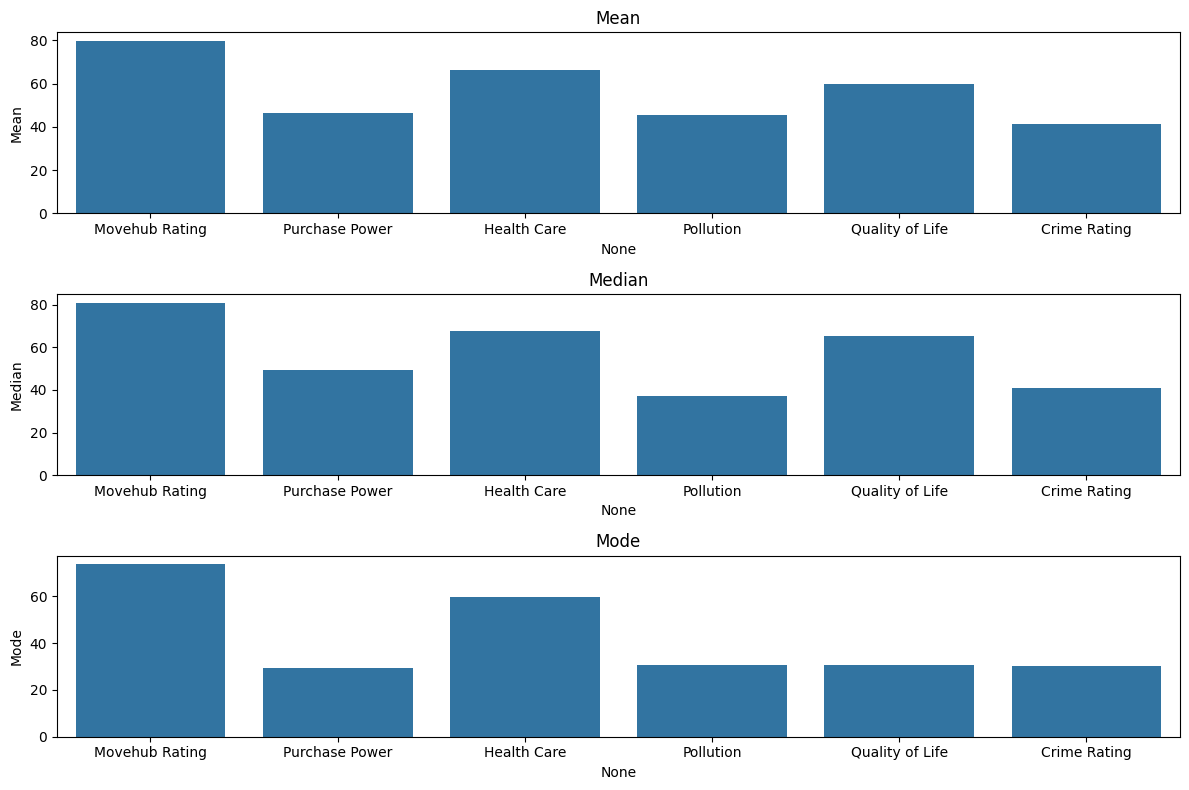

In [15]:
# Create bar plots for each measure of central tendency
plt.figure(figsize=(12, 8))

# Mean bar plot
plt.subplot(3, 1, 1)
sns.barplot(x=central_tendency.index, y=central_tendency['Mean'])
plt.title("Mean")

# Median bar plot
plt.subplot(3, 1, 2)
sns.barplot(x=central_tendency.index, y=central_tendency['Median'])
plt.title("Median")

# Mode bar plot
plt.subplot(3, 1, 3)
sns.barplot(x=central_tendency.index, y=central_tendency['Mode'])
plt.title("Mode")

plt.tight_layout()
plt.show()

The bar plots for each central tendency provides a clear comparison of these statistics, as these different factors have roughly similar scales, so by looking at the three bar plots together, I can identify the pattern or trend in the central tendency of different factors across cities.

From the diagram above, I can conclude that the average Health Care and Quality of Life in cities are generally higher than its Purchase Power and Crime Rating. And I can also conclude that Health Care looks like the most influential factors as they have a large central tendency in relation to its Movehub Rating.

In [16]:
# Measures of Spread
numeric_columns = df.select_dtypes(include='number')

# Select numeric columns excluding 'city_id'
numeric_columns = df.drop('city_id', axis=1).select_dtypes(include='number')

#numeric_columns is used to hold columns containing a numeric data types to conduct numerical operations
spread = pd.DataFrame({
    'Column': numeric_columns.columns,
    'Standard Deviation': numeric_columns.std(),
    'Variance': numeric_columns.var(),
    'Max': numeric_columns.max(),
    'Min': numeric_columns.min(),
    'Range': (numeric_columns.max() - numeric_columns.min()).astype(float),
    'Interquartile Range (IQR)': (numeric_columns.quantile(0.75) - numeric_columns.quantile(0.25)).astype(float)
})

# Display the summaries
print("Measures of Spread:")
print(spread)

Measures of Spread:
                          Column  Standard Deviation    Variance     Max  \
Movehub Rating    Movehub Rating            6.501011   42.263143  100.00   
Purchase Power    Purchase Power           20.614519  424.958385   91.85   
Health Care          Health Care           14.416412  207.832938   95.96   
Pollution              Pollution           25.369741  643.623753   92.42   
Quality of Life  Quality of Life           22.019376  484.852919   97.91   
Crime Rating        Crime Rating           16.416409  269.498497   85.70   

                   Min  Range  Interquartile Range (IQR)  
Movehub Rating   59.88  40.12                     8.9500  
Purchase Power    6.38  85.47                    32.7925  
Health Care      20.83  75.13                    17.7875  
Pollution         0.00  92.42                    43.2650  
Quality of Life   5.29  92.62                    35.8650  
Crime Rating      9.11  76.59                    21.9525  


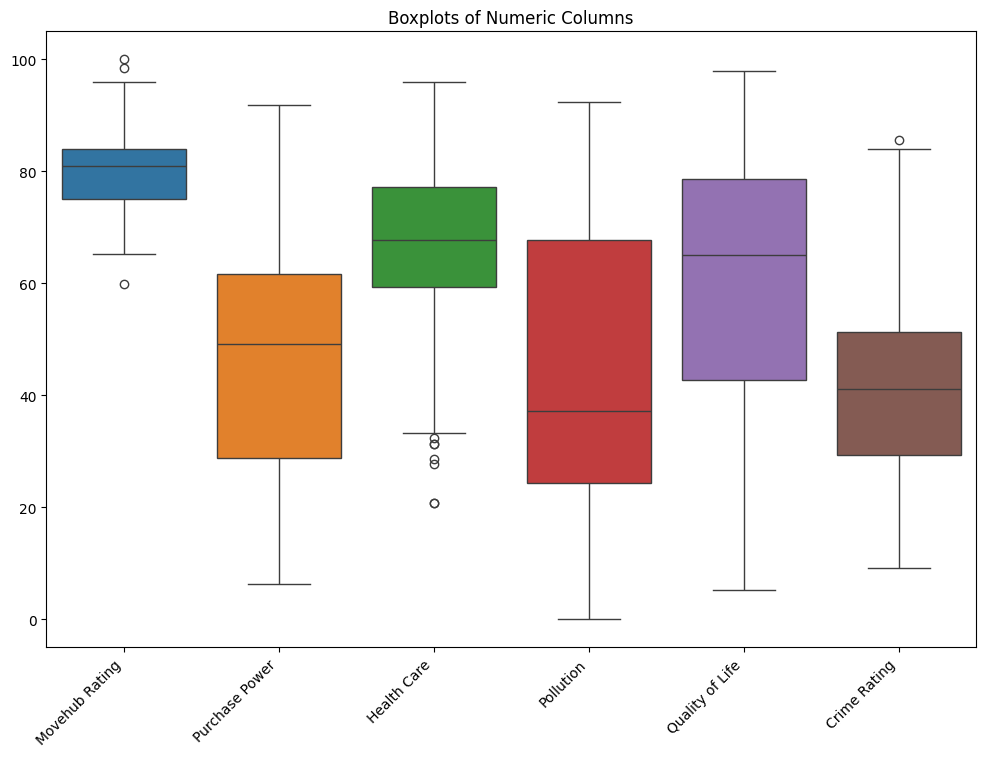

In [17]:
# Create a boxplot for each numeric column
plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_columns)
plt.title("Boxplots of Numeric Columns")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.show()

From the box plot above, we can see that columns with larger standard deviations and wider ranges such as Purchase power, Pollution and Quality of Life have a more spreaded out distributions  while the Movehub Rating, Health Care and Crime Rating have a more concentrated distributions. Through thix box plot, we can identify the factors that exhibit more variability and the factors that have a more concentrated distribution, which will allow a better understanding on which factors to select for linear regression model.

In [18]:
# Select numeric columns excluding 'city_id'
numeric_columns = df.drop('city_id', axis=1).select_dtypes(include='number')

# Type of Distribution
distribution_type = pd.DataFrame({
    'Column': numeric_columns.columns,
    'Skewness': skew(numeric_columns),
    'Kurtosis': kurtosis(numeric_columns)
})

# Display the summaries
print("\nType of Distribution (excluding 'city_id'):")
print(distribution_type)


Type of Distribution (excluding 'city_id'):
            Column  Skewness  Kurtosis
0   Movehub Rating -0.100884  0.246148
1   Purchase Power  0.029862 -1.013854
2      Health Care -0.705333  0.442119
3        Pollution  0.224609 -1.253025
4  Quality of Life -0.499341 -0.849101
5     Crime Rating  0.360046 -0.369050


After finding out the skewness and kurtosis, which are both statistical measures to measure the shape and characteristics of a probability distribution. I then plot a histogram and density plot with the values of skewness and kurtosis to provide a visualization on the types of distribution the dataset is.

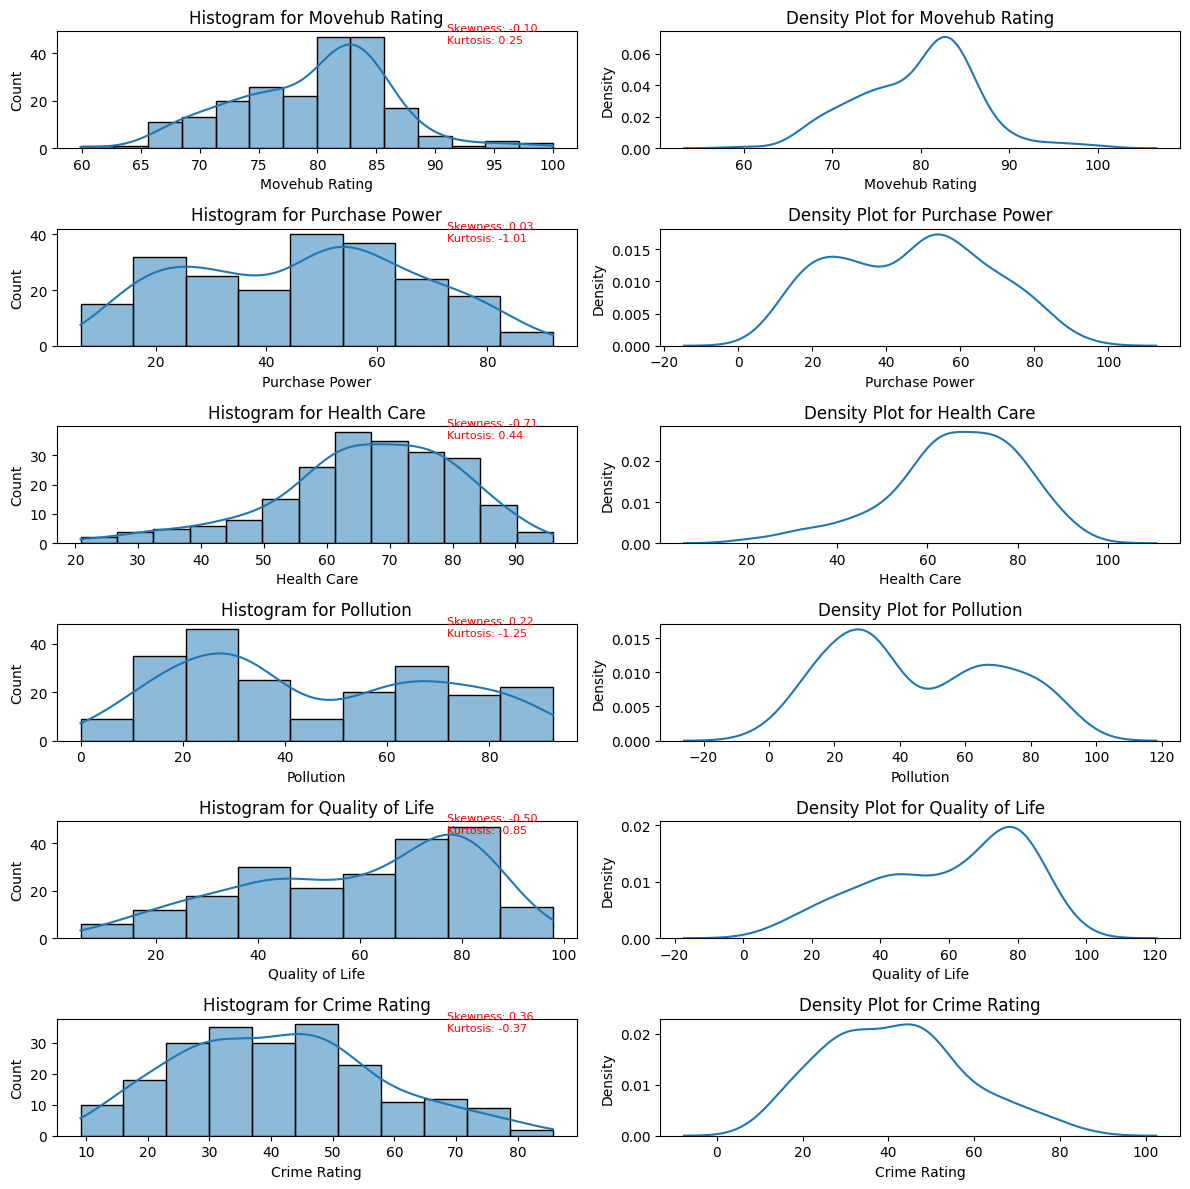

In [19]:
# Select numeric columns excluding 'city_id'
numeric_columns = df.drop('city_id', axis=1).select_dtypes(include='number')

# Create subplots , number of rows = length of columns
fig, axes = plt.subplots(nrows=len(numeric_columns.columns), ncols=2, figsize=(12, 2 * len(numeric_columns.columns)))

# Iterate through each numeric column
for i, col in enumerate(numeric_columns.columns):

    # Plot histogram for all the columns
    sns.histplot(numeric_columns[col], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram for {col}')

    # Plot density plot for all the columns
    sns.kdeplot(numeric_columns[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Density Plot for {col}')

    # Print skewness and kurtosis
    skew_val = skew(numeric_columns[col])
    kurtosis_val = kurtosis(numeric_columns[col])
    axes[i, 0].text(0.75, 0.9, f'Skewness: {skew_val:.2f}\nKurtosis: {kurtosis_val:.2f}', transform=axes[i, 0].transAxes, fontsize=8, color='red')

# Adjust layout
plt.tight_layout()
plt.show()


Histogram are used to visualized the frequency distribution of a numeric variable, which in this case, it is suitable for the dataset, where we can observe the shape of the distribution for each columns.

Density plots also help to visualized the smooth estimate of the distributions; probability density where we can observe the overall shape and smoothness of the distribution using skewness and kurtosis.


---


From diagrams, we can conclude the different columns which has a symmetric , right-skewed or left-skewed distribution.

Symmetric distribution: Movehub Rating

Left-skewed distribution: Health Care, Quality of Life as they both have negative skewness and positive kurtosis, which shows they have a distribution with a heavier tail.

Right-skewed distribution: Purchase Power, Pollution and Crime Rating as they have positive skewness and negative kurtosis which shows they have a distributions with a lighter tail.


---




Based on the diagram, the potential features for Regression Model could be 'Purchase Power,' 'Health Care,' 'Pollution,' and 'Quality of Life.' As they show variability in their distributions, making them suitable for regression analysis.

The potental labels for Regression Model could be 'Movehub Rating' or 'Crime Rating' as they are likely to be influenced by the features, being a dependent variables and making them suitable as target variables for Regression Model.

Firstly, I will be using 'Crime Rating' as the label since I want to observe if there are any relationship between the features and labels if any of the urban metrics will have a correlation and influence the crime rating of a city. And with the help of the Regression Model, they could help predict the crime rating of a cities based on the urban metrics in the city.

# Building the Machine Learning model

features: Purchase Power

labels: Crime Rating

### Metrics used to evaluation the model:
Mean Square Error(MSE) & R-squared.

MSE measures the average squared difference between the predicted and actual values, where lower values indicate a better model performance. R-squared on the other hand, measures how well the model explains variance in the data, where higher values indicate a better fit.

These two metrics were chosen because it provides a clear quantification of the predictions errors where we can expect from a linear regression relationship between its features and labels, we will be able to predict and evaluate how well the linear regression model's predictive capabitilies is at with these two metrics.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features : Starting with only Purchase Power
features = df[['Purchase Power']]

# Labels : Crime Rating
crime_rating = df['Crime Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, crime_rating, test_size=0.4, random_state=42)

# Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 221.8201863542334
R-squared: 0.017152151988463427


# Scatter plot for Linear Regression: Purchase Power vs. Crime Rating

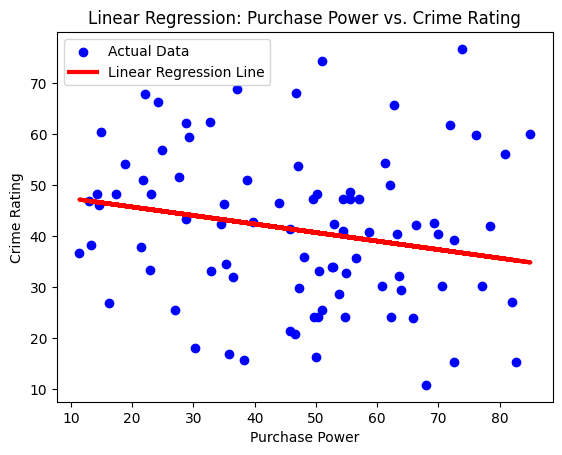

In [21]:
# Scatter plot of the data
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Plot the linear regression line
plt.plot(X_test, predictions, color='red', linewidth=3, label='Linear Regression Line')

# Labels and title
plt.xlabel('Purchase Power') # X-axis label
plt.ylabel('Crime Rating') # Y-axis label
plt.title('Linear Regression: Purchase Power vs. Crime Rating')

# Display legend
plt.legend()

# Show the plot
plt.show()

## Model evaluation:
The linear regression model trained on the current dataset, with 'Purchase Power' as the sole predictor, showed a very limited performance. Its evaluation metrics such as ,Mean Squared Error (MSE) of 221.82 and an R-squared value of 0.017, suggest an extremely weak fit to the data.

From the scatter plot, it is evident that the actual data points have little to no correlation with the linear regression line as the model failed to capture any underlying patterns in the data.

To improve the model's predictive capabilities, further pre-processing steps are needed. Therefore, there will be an exploration of features engineering techniques as well as cross-validations to be implemented.

## Cross validation

In [22]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, features, crime_rating, cv=5, scoring='neg_mean_squared_error')
cv_r2_scores = cross_val_score(model, features, crime_rating, cv=5, scoring='r2')

# Display cross-validation scores
print(f'Cross-validation Mean Squared Error: {-cv_scores.mean()}')
print(f'Cross-validation R-squared: {cv_r2_scores.mean()}')

Cross-validation Mean Squared Error: 391.54387087824574
Cross-validation R-squared: -17.1926163174136


## Cross-validation Mean Squared Error evaluation:

Having a higher value of 391.54 suggests that on average, the model's predictions deviate greatly from the actual values.

Cross-validation R-squared evaluation:

Having a negative R-squared value of -17.19 suggests that the model is performing poorly compared to simple mean-based model.

Both results indicates that the chosen model and features are not suitable for the data.

## Further Cross validation using LeaveOneOut

In [23]:
from sklearn.model_selection import LeaveOneOut

# Instantiate the Linear Regression model
model = LinearRegression()

# Perform leave-one-out cross-validation

cv_scores = cross_val_score(model, features, crime_rating, cv=LeaveOneOut(), scoring='neg_mean_squared_error')

# Display LOOCV Mean Squared Error
print(f'LOOCV Mean Squared Error: {-cv_scores.mean()}')

LOOCV Mean Squared Error: 264.01928857546034


### Leave-one-out cross-validation evaluation:

Having a higher Leave-one-out Mean Squared Error compared to the original model Mean Squared Error means that the model performed less consistent across all data points as compared to a simple mean-based model. Thus, re-evaluating feature selection such as further exploration of additional features might better explain the reasons behind the variation in the target variable.

## Feature engineering part 1

Implementing polynomial features with the help of pipeline and plotting a scatter plot

In [24]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline with polynomial features and standardization
polyreg_model = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), LinearRegression())

# Fit the model to the training data
polyreg_model.fit(X_train, y_train)

# Make predictions on the test set
polyreg_predictions = polyreg_model.predict(X_test)

# Evaluate the model
polyreg_mse = mean_squared_error(y_test, polyreg_predictions)
polyreg_r2 = r2_score(y_test, polyreg_predictions)

print(f'Mean Squared Error (PolyReg): {polyreg_mse}')
print(f'R-squared (PolyReg): {polyreg_r2}')


Mean Squared Error (PolyReg): 219.17904871699446
R-squared (PolyReg): 0.028854587577067492


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


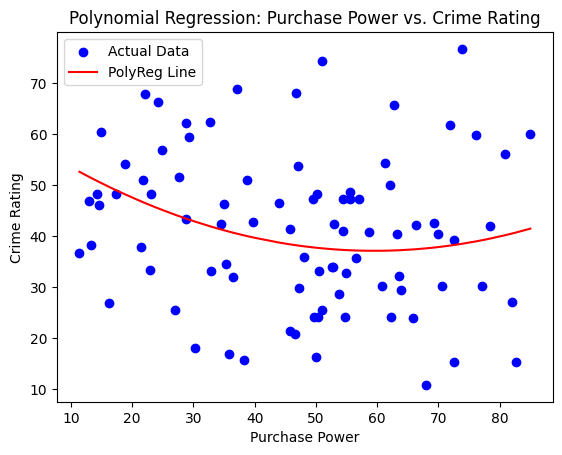

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of the data
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Sort the test data for a smoother plot
sorted_indices = np.argsort(X_test.values.flatten()) #convert  X_test into 1D array to be sorted
X_test_sorted = X_test.values[sorted_indices] #sorts the rows of X_test
polyreg_predictions_sorted = polyreg_model.predict(X_test_sorted.reshape(-1, 1)) #shape X_test sorted into a vector

# Plot the polynomial regression line
plt.plot(X_test_sorted, polyreg_predictions_sorted, color='red', label='PolyReg Line')

# Labels and title
plt.xlabel('Purchase Power')
plt.ylabel('Crime Rating')
plt.title('Polynomial Regression: Purchase Power vs. Crime Rating')

# Display legend
plt.legend()
# Show the plot
plt.show()

After implementing polynomial features to the model and plotting the scatter plot, it appears that there is a slight improvement in performence compared to the original linear regression model, where the Mean Squared Error(MSE) is 219.18 as compared to 221.82 of the original. The R-squared value has a small improvement but it is still at a low of 0.0289.

While the improvement are relatively small, it suggests that the implementation of polynomial features has allowed the model to better capture the relationship in the data.

## Feature engineering part 2

Includes more features into the model, this time, the features consists of 'Purchase Power' , 'Quality of Life' and 'Pollution'.

In [26]:
# Features
features = df[['Purchase Power' , 'Quality of Life' , 'Pollution']]

# Labels : Crime Rating
crime_rating = df['Crime Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, crime_rating, test_size=0.4, random_state=42)

# Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 162.83055121142027
R-squared: 0.27852527996209386


## Plotting 3 pairwise scatter plot of each features against 'Crime Rating'

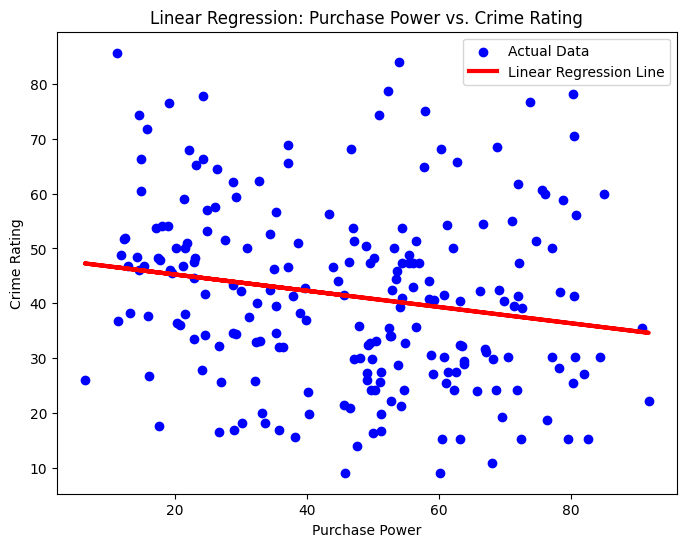

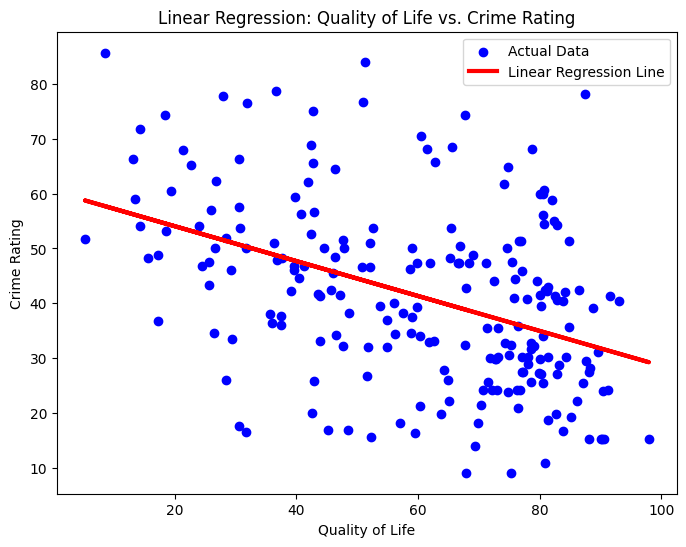

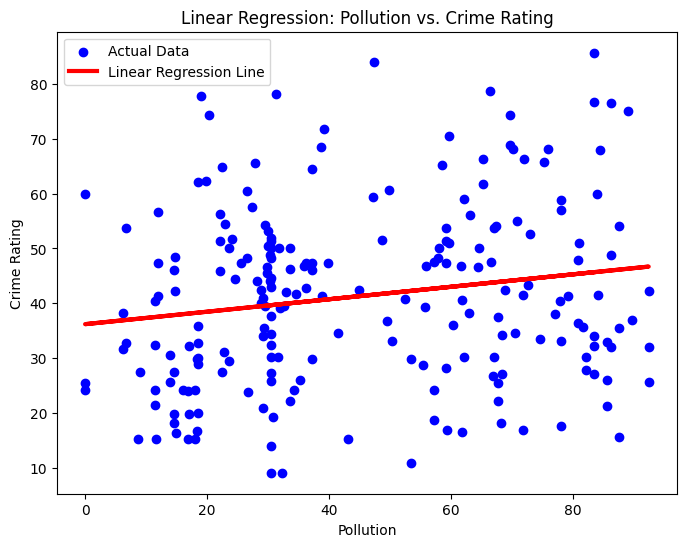

In [27]:
import matplotlib.pyplot as plt

# Pairwise scatter plots for features against 'Crime Rating'
for feature in features.columns:
    plt.figure(figsize=(8, 6))

    # Scatter plot of the data
    plt.scatter(features[feature], crime_rating, color='blue', label='Actual Data')

    # Linear Regression model for the current feature
    model = LinearRegression()
    model.fit(features[[feature]], crime_rating)
    predictions = model.predict(features[[feature]])

    # Plot the linear regression line
    plt.plot(features[feature], predictions, color='red', linewidth=3, label='Linear Regression Line')

    # Labels and title
    plt.xlabel(feature)  # X-axis label
    plt.ylabel('Crime Rating')  # Y-axis label
    plt.title(f'Linear Regression: {feature} vs. Crime Rating')

    # Display legend
    plt.legend()

    # Show the plot
    plt.show()


After including two more features 'Pollution' and 'Quality of Life' into the linear regression model and plotting the scatter plots, it appears that the decrease in MSE from 221.82 to 162.83 and increase in R-squared from 0.017 to 0.279 suggest that the model with additional features is performing better, as the model was able to capture the underlying patterns in the data better, leading to a better prediction of 'Crime Rating'.

However, in conclusion, the results still indicate that the chosen model and features are not suitable for the data as the scatter plot indicate that it was not evident that there is a correlation between the different features and its label.

Therefore, I have decided to use 'Movehub Rating' instead of'Crime Rating' as the label, and to see if the machine learning model will perform better with linear regression when 'Movehub Rating' is the label instead.

# Building the Machine Learning Model 2.0

features: Purchase Power , Pollution

labels: Movehub Rating

In [28]:
# Features : Starting with only Purchase Power
features = df[['Purchase Power', 'Pollution']]

# Labels : Crime Rating
movehub_rating = df['Movehub Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, movehub_rating, test_size=0.4, random_state=42)

# Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 16.721640526105183
R-squared: 0.5959715711184661


## 3D Scatter Plot with Regression Plane

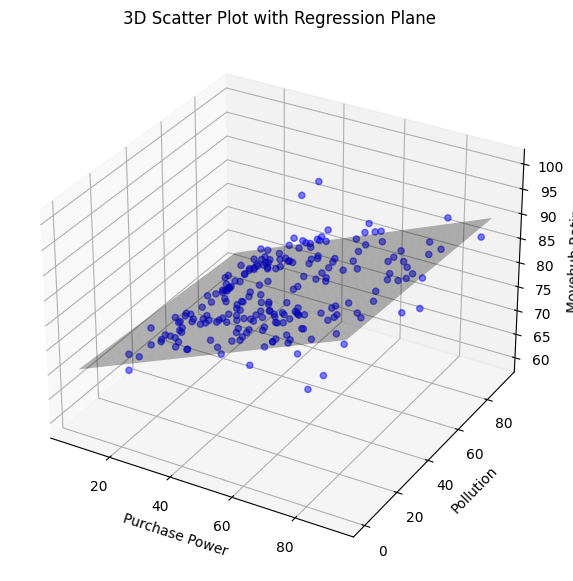

In [29]:
from mpl_toolkits.mplot3d import Axes3D

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Create a mesh grid for the regression plane
# Create vectors for 'Purchase Power' & 'Pollution'
# Set the range of both x and y from 0 to 100 between its min and max value to show a the model performances on the entire range of feature value
x_surf, y_surf = np.meshgrid(np.linspace(df['Purchase Power'].min(), df['Purchase Power'].max(), 100),
                             np.linspace(df['Pollution'].min(), df['Pollution'].max(), 100))
onlyX = pd.DataFrame({'Purchase Power': x_surf.ravel(), 'Pollution': y_surf.ravel()})
fittedY = model.predict(onlyX)

# Convert the predicted Movehub Rating to the same shape as the mesh grid
fittedY = fittedY.reshape(x_surf.shape)

# Scatter plot for the actual data points
ax.scatter(df['Purchase Power'], df['Pollution'], df['Movehub Rating'], c='blue', marker='o', alpha=0.5)

# Plot the linear regression surface
ax.plot_surface(x_surf, y_surf, fittedY, color='None', alpha=0.3)

# Labels and title
ax.set_xlabel('Purchase Power')
ax.set_ylabel('Pollution')
ax.set_zlabel('Movehub Rating')
ax.set_title('3D Scatter Plot with Regression Plane')

# Show the plot
plt.show()


## Model Evaluation:

This time with two features, 'Purchase Power' and 'Pollution' and using 'movehub Rating' as the label instead, the linear progression model managed to perform a MSE value of 16.72, and an R-squared value of 0.596.

Together with the 3D scatter plot,it is evident that the model managed to show a decent degree of alignment between the data points and the regression plane, which also indicates that the model managed to caupture some of the underlying pattern, but it is not a perfect fit.

Therefore, the model suggests that the two featues do have an influence on 'Movehub Rating' but they are not the only factor, and so, further exploration of feature engineering techniques and cross-validations can be implemented to improve the model's performance.

## Cross Validation

In [30]:
# Perform cross-validation
cv_scores = cross_val_score(model, features, movehub_rating, cv=5, scoring='neg_mean_squared_error')
cv_r2_scores = cross_val_score(model, features, movehub_rating, cv=5, scoring='r2')

# Display cross-validation scores
print(f'Cross-validation Mean Squared Error: {-cv_scores.mean()}')
print(f'Cross-validation R-squared: {cv_r2_scores.mean()}')

Cross-validation Mean Squared Error: 13.549474120944414
Cross-validation R-squared: 0.6891843356804381


Cross-validation evaluation: After cross-validation, MSE has a lower value of 13.54 which suggests that on average, the model performs better across different data subsets and having a higher R-squared value of 0.689 indicates that the model managed to explain more of the variance in the data.

Overall, both results indicates that the model's performance is more consistent and likely to generalize well to new data.

## Further Cross-validation using LeaveOneOut

In [31]:
# Perform leave-one-out cross-validation
cv_scores = cross_val_score(model, features, movehub_rating, cv=LeaveOneOut(), scoring='neg_mean_squared_error')

# Display LOOCV Mean Squared Error
print(f'LOOCV Mean Squared Error: {-cv_scores.mean()}')

LOOCV Mean Squared Error: 13.093866693849927


Leave-one-out cross-validation evaluation:

Having a lower Leave-one-out MSE value of 13.093 compared to the original model's MSE of 16.726 suggests that the model's predictive accuracy has improve across all data points. Although the results indicates a good model performance, it is still esstential to continue refining and validation the model to ensure its best performance for the dataset.

## Feature Engineering

Implementing polynomial features with the help of pipeline and plotting a scatter plot

In [32]:
# Create a pipeline with polynomial features and standardization
polyreg_model = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), LinearRegression())

# Fit the model to the training data
polyreg_model.fit(X_train, y_train)

# Make predictions on the test set
polyreg_predictions = polyreg_model.predict(X_test)

# Evaluate the model
polyreg_mse = mean_squared_error(y_test, polyreg_predictions)
polyreg_r2 = r2_score(y_test, polyreg_predictions)

print(f'Mean Squared Error (PolyReg): {polyreg_mse}')
print(f'R-squared (PolyReg): {polyreg_r2}')

Mean Squared Error (PolyReg): 12.25816270225265
R-squared (PolyReg): 0.703818162468361


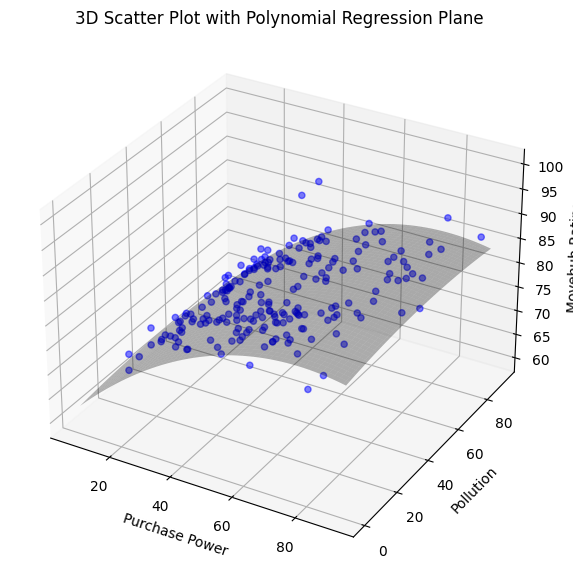

In [33]:
# Create a mesh grid for the polynomial regression plane
# Set the range for 'Purchase Power' and 'Pollution'
x_surf, y_surf = np.meshgrid(
    np.linspace(df['Purchase Power'].min(), df['Purchase Power'].max(), 100),
    np.linspace(df['Pollution'].min(), df['Pollution'].max(), 100)
)

# Create a new DataFrame with the mesh grid values
onlyX = pd.DataFrame({'Purchase Power': x_surf.ravel(), 'Pollution': y_surf.ravel()})

# Predict the Movehub Ratings for the mesh grid using the polynomial regression model
polyreg_fittedY = polyreg_model.predict(onlyX)

# Reshape the predicted values to match the shape of the mesh grid
polyreg_fittedY = polyreg_fittedY.reshape(x_surf.shape)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the actual data points
ax.scatter(df['Purchase Power'], df['Pollution'], df['Movehub Rating'], c='blue', marker='o', alpha=0.5)

# Plot the polynomial regression surface
ax.plot_surface(x_surf, y_surf, polyreg_fittedY, color='None', alpha=0.3)

# Labels and title
ax.set_xlabel('Purchase Power')
ax.set_ylabel('Pollution')
ax.set_zlabel('Movehub Rating')
ax.set_title('3D Scatter Plot with Polynomial Regression Plane')

# Show the plot
plt.show()

After implementing polynomial features to the model and plotting the scatter plot, it it evident that our regression model has improved in its predictive accuracy, as evidenced by the lower MSE and higher R-squared value. It has an MSE value of 12.25 compared to 16.72 of the original linear regression model, while its R-squared is 0.703 as compared to 0.595 of the original linear regression model. From the 3d scatter plot, it is also evident that the polynomial regression modal fits the data more closely.

In summary, the implementation of polynomial features has allowed the model to better capture the underlying relationship in the data.

## Feature engineering part 2

Include two more features, 'Quality of Life' and 'Health Care' into the model.

features: Purchase Power, Pollution, Heath Care, Quality of Life

labels: Movehub Rating

In [34]:
# Features : Starting with only Purchase Power
features = df[['Purchase Power', 'Pollution', 'Health Care', 'Quality of Life']]

# Labels : Movehub Rating
movehub_rating = df['Movehub Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, movehub_rating, test_size=0.4, random_state=42)

# Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 16.441573964923123
R-squared: 0.6027385418902627


## Plotting 4 pairwise scatter plot of each features against 'Movehub Rating'

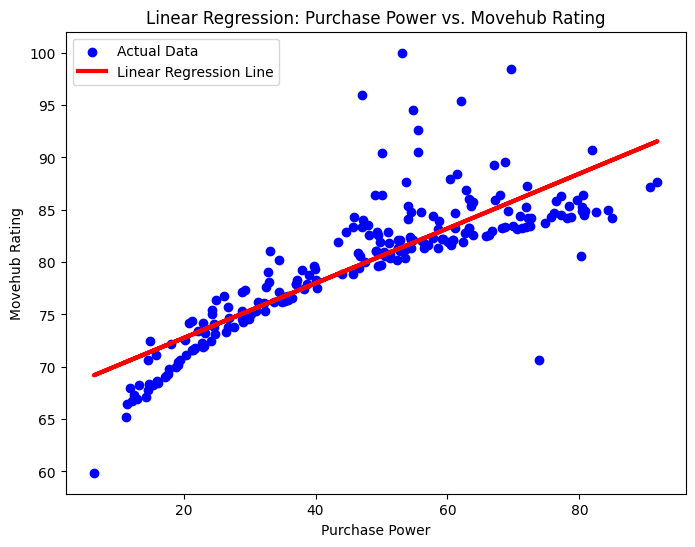

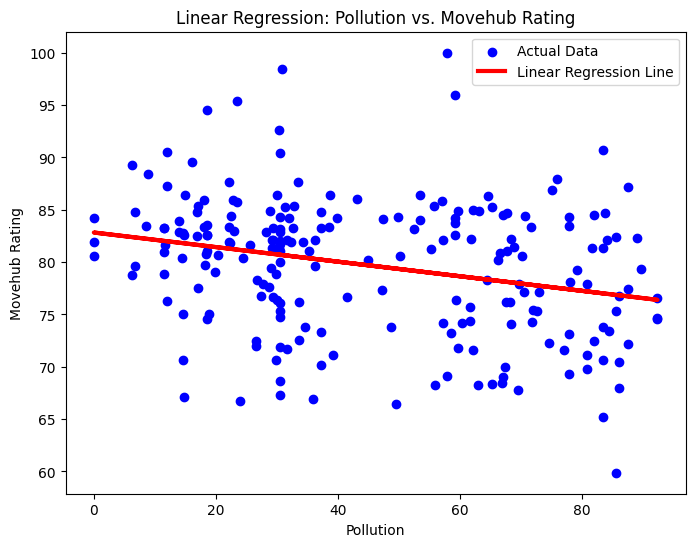

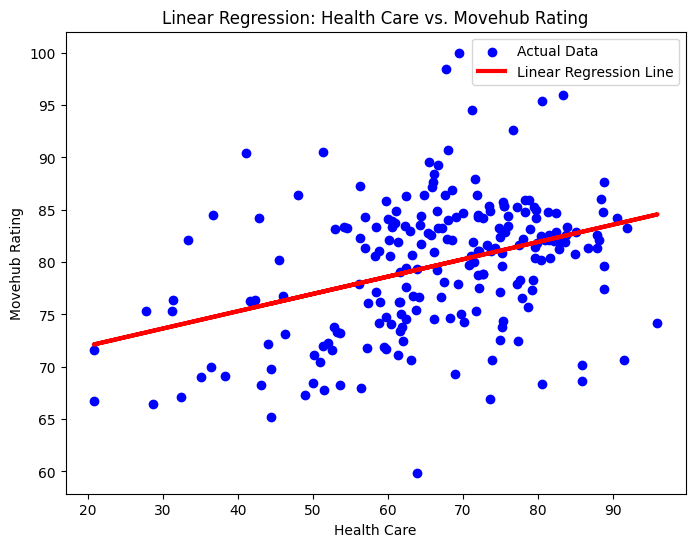

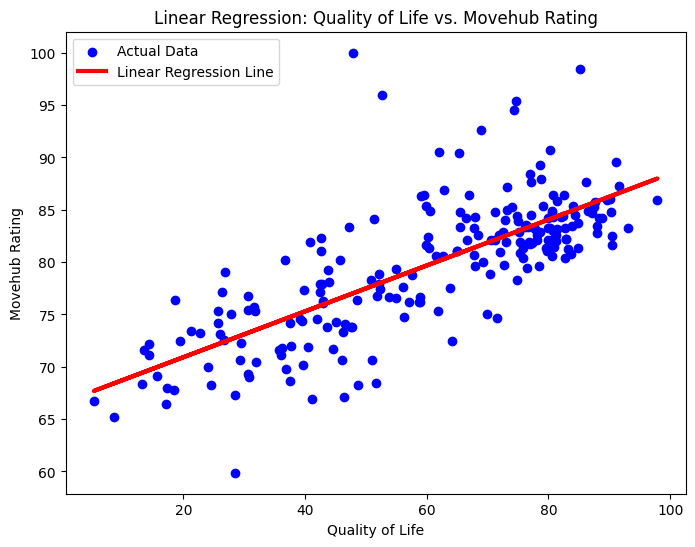

In [36]:
# Pairwise scatter plots for features against 'Movehub Rating'
for feature in features.columns:
    plt.figure(figsize=(8, 6))

    # Scatter plot of the data
    plt.scatter(features[feature], movehub_rating, color='blue', label='Actual Data')

    # Linear Regression model for the current feature
    model = LinearRegression()
    model.fit(features[[feature]], movehub_rating)
    predictions = model.predict(features[[feature]])

    # Plot the linear regression line
    plt.plot(features[feature], predictions, color='red', linewidth=3, label='Linear Regression Line')

    # Labels and title
    plt.xlabel(feature)  # X-axis label
    plt.ylabel('Movehub Rating')  # Y-axis label
    plt.title(f'Linear Regression: {feature} vs. Movehub Rating')

    # Display legend
    plt.legend()

    # Show the plot
    plt.show()

After including two more features 'Health Care' and 'Quality of Life' into the linear regression model and plotting the scatter plots, it appears that there is a slight improvement in both the MSE and R-squared values for the feature-engineered model, where the MSE value is 16.44 compared to 16.72 and R-squared value is 0.602 compared to 0.595. This suggests that the additional features have contributed positively to the model's predictive capabilities in capturing the underlying relationship in the data.

From the four pairwise scatter plots, it is evident that 'Purchase Power' and 'Quality of Life' have a generally positive linear relationship to 'Movehub Rating'while 'Pollution' and 'Health Care' showed a smaller margin of positive linear relationship to 'Movehub Rating'.

# Overall project evaluation and conclusion:

### Initial model for Crime Rating:
The model was initially tested with the feature 'Purchase Power' against 'Crime Rating', using the two key metrics, Mean Squared Error(MSE) and R-squared value to determine the model predictive capabilities.The model had a MSE value of 221.82 and R-squared value of 0.017 which were sub-optimal. Then from the scatter plot, it showed that the data points had a very complex relationship between the 'Purchase Power' and 'Crime Rating' thus the model was unable to capture any underlying relationship.

The model then performed worse when cross validation was tested as they had a MSE value of 391.54 and R-squared value of -17.19, which deviate greatly from the original model. When Leave One Out was applied as part of cross validation, the model had an higher Leave-one-out MSE value of 264.01, although it was an improvement of results, but compared to the original model MSE of 221.82, it is still a bad results as the model are not capturing any underlying relationship with the data. Thus, re-evalutating features and implementing polynomial was necessary to better validate the model.

Pipeline was deployed as part of polynomial features and it yielded a MSE value of 219.17 and R-squared of 0.028 which was an improvement on the model's performance compared to the original value at 221.82 and 0.017 respectively. A polynomial regression scatter plot was plotted and it showed that the model was able to better capture the relationship in the data.

Two more features, 'Quality of Life' and 'Pollution' was then included and its respectively scatter plot were plotted. There was a significant decrease in MSE from 221.82 to 162.83 and an increase in R-squared from 0.017 to 0.279 which both suggest that the modal with additional features was performing significantly bettter in capturing the underlying relationship in the data, which will lead to a better prediction of 'Crime Rating' by the model.

However, the results still indicated that despite the improvement, the high value of MSE means the model and features are not suitable for the data , therefore it has

Thus, a second model was then implemented using 'Movehub Rating' as the label now to test if the model will perform linear regression better against other features.

### Model for Movehub Rating:
The model was tested with two features, 'Purchase Power' and 'Pollution' against 'Movehub Rating' as the label. This time, the model managed to performed a MSE value of 16.72 and R-squared value of 0.596. A 3D scatter plot was plotted and it managed to show that the model was able to capture most of the underlying pattern in the data. This mean that both features have a influence on 'Movehub Rating'. However it was not a perfect fit and so, further feature engineering and cross-validations were then implemented.

After cross-validation, the model had a lower MSE of 13.54 and a higher R-squared value of 0.689 which indicates that the model was performing better as they are trained on all available data. Leave-one-out cross-validations was also implemented onto the model and it also lead to a slight improvement in the model's predictive capabilities, showing a MSE value of 13.093 compared to 16.72 of the original model.

Then polynomial feature was also implemented to the model. The model shown an improvement in its predictive accuracy as it has a lower MSE and higher R-squared value of 12.25 and 0.703 respectively. The plotted 3D scatter plot also showed that the polynomial regression model was able to fit the data more closely.

Further feature engineering was implemented by including two more features, 'Health Care' and 'Quality of Life' into the linear regression model. However, the model only showed marginal improvement as the model has an MSE value of 16.44, slightly lesser than 16.72 of the original. R-squared value was improved marginally as well, from 0.595 originally to 0.602. This suggest that although the additional features have contributed positively to the model's predictive capabilities, however it was very marginal.

Thus 4 pairwise scatter plots were plotted on each features to identify the features showing more linear relationship with 'Movehub Rating'. From the scatter plots, 'Purchase Power' and 'Quality of Life' showed the most positive linear relationship with 'Movehub Rating' while 'Pollution' and 'Health Care' showed lesser linear relationship with 'Movehub rating'.

### Reflective evalution:
In conclusion, the project has demostrated that feature engineering and selections played an important role in the success and improvement of a machine learning model as they improves the model's predictive capabilities. And, the shift from predicting 'Crime Rating' to 'Movehub Rating' showed the importance of choosing the right target variables and relevent features. We can conclude that 'Movehub Rating' was a better target variable than 'Crime Rating'. It also highlighted that the nature of machine learning projects, where the initial attempts may not yield the optimal results, but with continuous refinement and adaptaion, can eventually lead to an improved and optimal results.

### Contributions to urban planning domain:
By being able to provide a predictive model for 'Movehub Rating', the model can be valuable for individuals and organizations seeking to understand and evaluate the quality of life in different cities based on the different key factors. These individuals and organizations can vary from urban planners and policymakers, and these insights and information gained from the model can help assist them in decision-making related to urban planning, real estate investments and quality of life assessments. For example, knowing that purchase power and quality of life have a bigger impact on affecting 'Movehub Rating', urban planners can plan around and use the model to predict the 'Movehub Rating' of their cities given that the values of the key factors like purchase power and quality of life changes over time. And urban planners can focus on improving the key factors like reducing pollutions, improving healthcare infrastructure in order to improve its 'Movehub Rating'. Resulting in better city development across the world.

### Transferability to other domains:
The transferability will need to be dependant on the nature and relavancy of the dataset. If there are similar data and features available, for example, a different quality of life measuring features such as for example: Death Rate, Employment rate, Disposable income, etc. Then the choice of target variable and features should also align with the specific problem and context of the new domain. However, I would say since the model focuses on urban planning domain, the transferability would be limited only to its neighbouring similar domains.
